You should implement at least the modules Linear (fully connected layer), ReLU , Tanh , Sequential
to combine several modules in basic sequential structure, and LossMSE to compute the MSE loss.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
def prepare_standardplot(title, xlabel):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
    fig.suptitle(title)
    ax1.set_ylabel('MSE')
    ax1.set_xlabel(xlabel)
    ax2.set_ylabel('accuracy [% correct]')
    ax2.set_xlabel(xlabel)
    return fig, ax1, ax2

def finalize_standardplot(fig, ax1, ax2):
    ax1handles, ax1labels = ax1.get_legend_handles_labels()
    if len(ax1labels) > 0:
        ax1.legend(ax1handles, ax1labels)
    ax2handles, ax2labels = ax2.get_legend_handles_labels()
    if len(ax2labels) > 0:
        ax2.legend(ax2handles, ax2labels)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)

def plot_history(history, title):
    fig, ax1, ax2 = prepare_standardplot(title, 'epoch')
    ax1.plot(history['tr_loss'], label = "training")
    ax1.plot(history['val_loss'], label = "validation")
    ax2.plot(history['tr_acc'], label = "training")
    ax2.plot(history['val_acc'], label = "validation")
    finalize_standardplot(fig, ax1, ax2)
    return fig


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [4]:
from sequential import Sequential
from linear import Linear
from activations import ReLU, Tanh
from losses import MSE
from utils import build_data

In [5]:
import warnings
warnings.filterwarnings("ignore", message="other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.")

In [6]:
x_train, y_train = build_data(1000)
x_validation, y_validation = build_data(1000)

In [7]:
def build_model():
    model = Sequential(MSE(), input_size=2)
    model.add_layer(Linear(2, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(ReLU(25))
    model.add_layer(Linear(25, 25))
    model.add_layer(Tanh(25))
    model.add_layer(Linear(25, 2))
    return model

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	Tanh activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.12370300561469048
Loss at epoch 2 : 0.1045238491177297
Loss at epoch 3 : 0.08774130673557738
Loss at epoch 4 : 0.12909467913484696
Loss at epoch 5 : 0.08521733888283689
Loss at epoch 6 : 0.07619065469416274
Loss at epoch 7 : 0.07867611348120772
Loss at epoch 8 : 0.07938692450305097
Loss at epoch 9 : 0.07328741569965223
Loss at epoch 10 : 0.0721932652338628
Loss at epoch 11 : 0.0694894474044213
Loss at epoch 12 : 0.06824512642889022
Loss at epoch 13 : 0.06766631935738951
Loss at epoch 14 : 0.06973746403141376
Loss at epoch 15 : 0.06668788044474513
Loss at epoch 16 : 0.06604209066258909
Loss at epoch 17 : 0.0654676334341857
Loss at epoch 18 : 0.06616850034301933
Loss at epoch 1

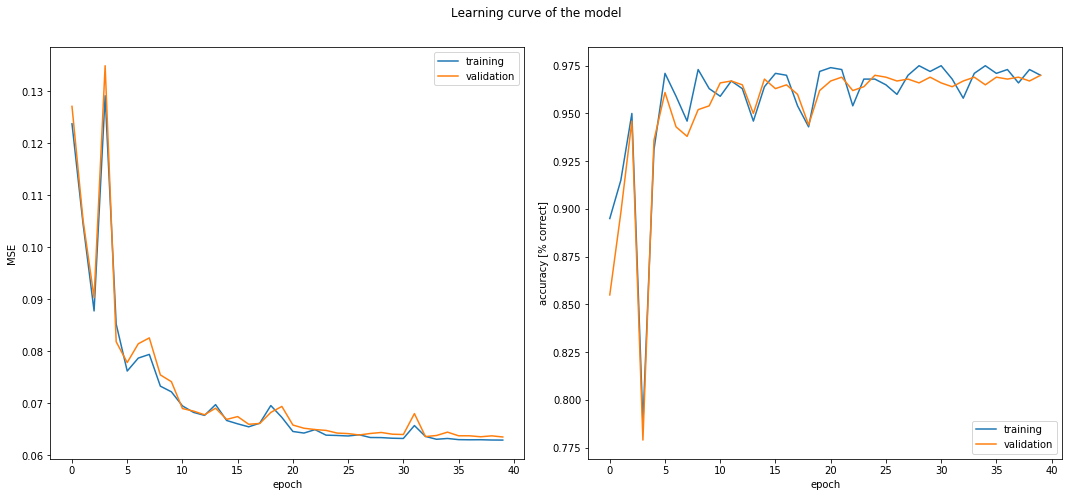

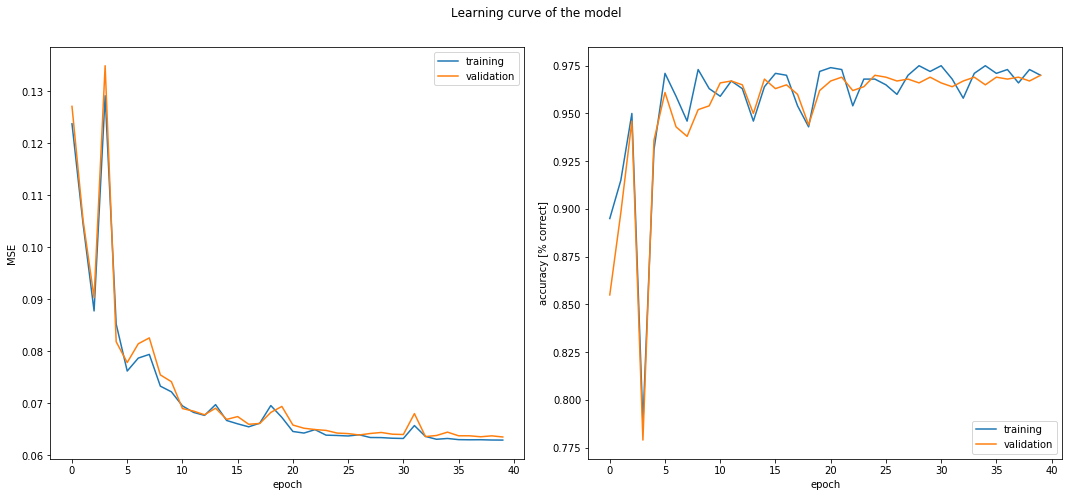

In [12]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train, x_validation, y_validation, epochs=40, step_size=0.001, momentum=0.5, batch_size=1)
plot_history(history, 'Learning curve of the model')

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	Tanh activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.11734784595979728
Loss at epoch 2 : 0.10690176939428785
Loss at epoch 3 : 0.09849613179490552
Loss at epoch 4 : 0.09798682726981132
Loss at epoch 5 : 0.09611040969903115
Loss at epoch 6 : 0.08237993887232005
Loss at epoch 7 : 0.0929737261319242
Loss at epoch 8 : 0.08526243798422184
Loss at epoch 9 : 0.08277640951029025
Loss at epoch 10 : 0.0799684078186001
Loss at epoch 11 : 0.07652675788771057
Loss at epoch 12 : 0.08000590775017917
Loss at epoch 13 : 0.07360262978090214
Loss at epoch 14 : 0.07288361997158063
Loss at epoch 15 : 0.07305962095185987
Loss at epoch 16 : 0.07592717857680145
Loss at epoch 17 : 0.0749138056582069
Loss at epoch 18 : 0.0717290665077835
Loss at epoch 1

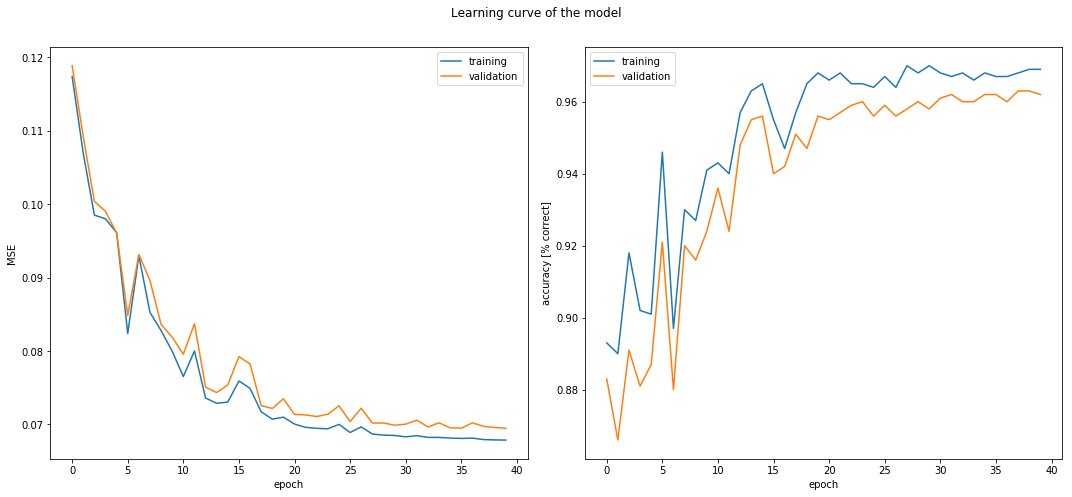

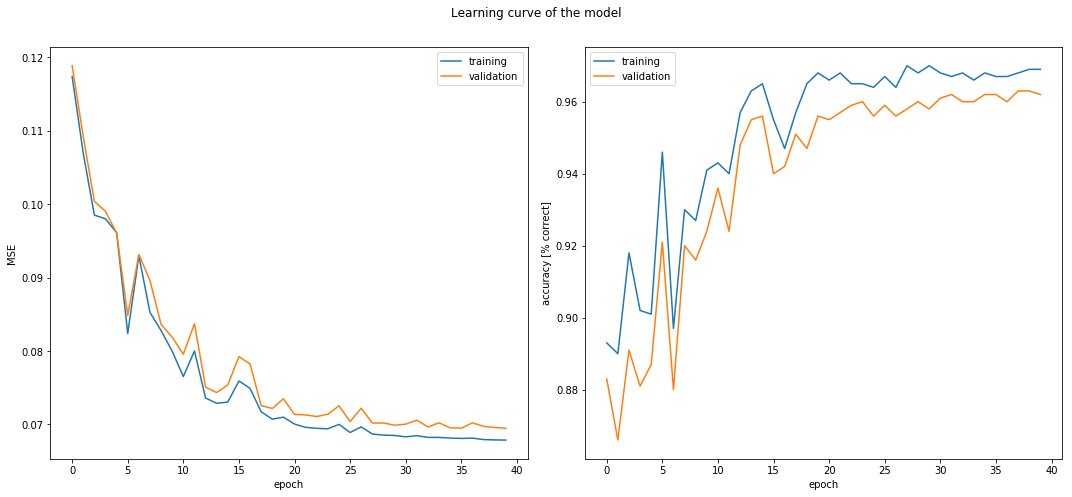

In [13]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train, x_validation, y_validation, epochs=40, step_size=0.001, momentum=0.2, batch_size=1)
plot_history(history, 'Learning curve of the model')

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	Tanh activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.107250161103766
Loss at epoch 2 : 0.08849939086996891
Loss at epoch 3 : 0.1210607609176368
Loss at epoch 4 : 0.0801731686371786
Loss at epoch 5 : 0.07994018964932638
Loss at epoch 6 : 0.07835624876560178
Loss at epoch 7 : 0.07828242304786909
Loss at epoch 8 : 0.0760361067923368
Loss at epoch 9 : 0.07529548368281394
Loss at epoch 10 : 0.07405600031866812
Loss at epoch 11 : 0.07450002406942985
Loss at epoch 12 : 0.08008838977655068
Loss at epoch 13 : 0.07400144930100577
Loss at epoch 14 : 0.07188843276309671
Loss at epoch 15 : 0.07372430525312484
Loss at epoch 16 : 0.07327240175912811
Loss at epoch 17 : 0.07363696657724358
Loss at epoch 18 : 0.07342513901761777
Loss at epoch 19

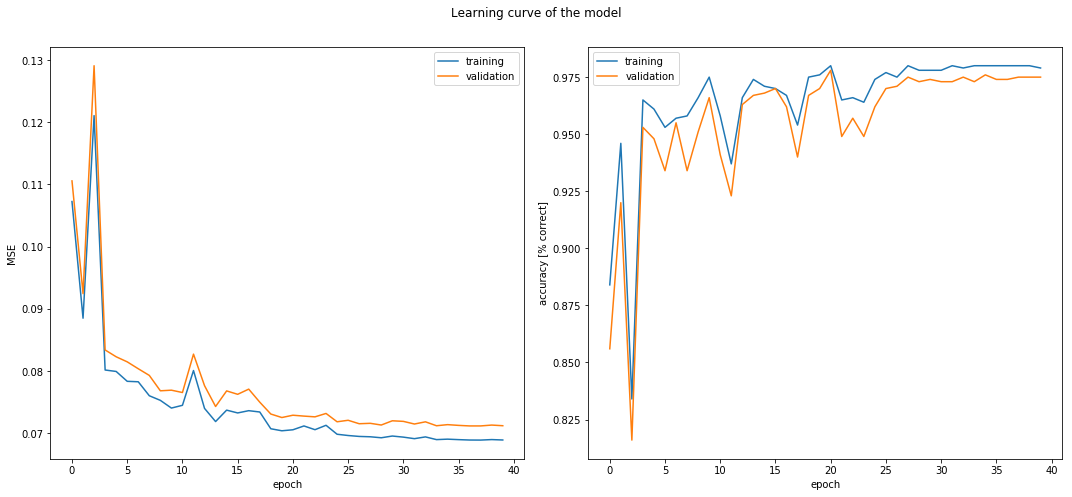

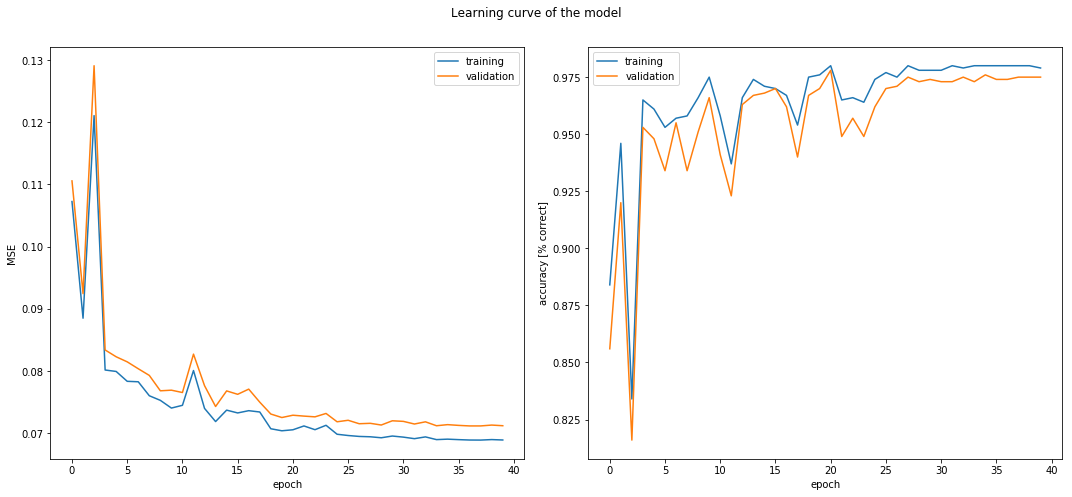

In [14]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train, x_validation, y_validation, epochs=40, step_size=0.001, momentum=0.8, batch_size=1)
plot_history(history, 'Learning curve of the model')

Model with 7 layers
	Input size : 2
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	ReLU activation layer of size 25
	Fully connected layer of 25 hidden units
	Tanh activation layer of size 25
	2 fully connected output units
Loss at epoch 1 : 0.25587335155904295
Loss at epoch 2 : 0.2514656682983041
Loss at epoch 3 : 0.23978368102759123
Loss at epoch 4 : 0.23781734946370126
Loss at epoch 5 : 0.23084424603171647
Loss at epoch 6 : 0.22774115639552475
Loss at epoch 7 : 0.2058492430523038
Loss at epoch 8 : 0.1888275626716204
Loss at epoch 9 : 0.16410033387248404
Loss at epoch 10 : 0.14938580734247808
Loss at epoch 11 : 0.14985742626100546
Loss at epoch 12 : 0.13704131210036577
Loss at epoch 13 : 0.1406182814678177
Loss at epoch 14 : 0.12150340507594229
Loss at epoch 15 : 0.11353912812178896
Loss at epoch 16 : 0.1072054492622101
Loss at epoch 17 : 0.10618563745744905
Loss at epoch 18 : 0.10605878001030943
Loss at epoch 19

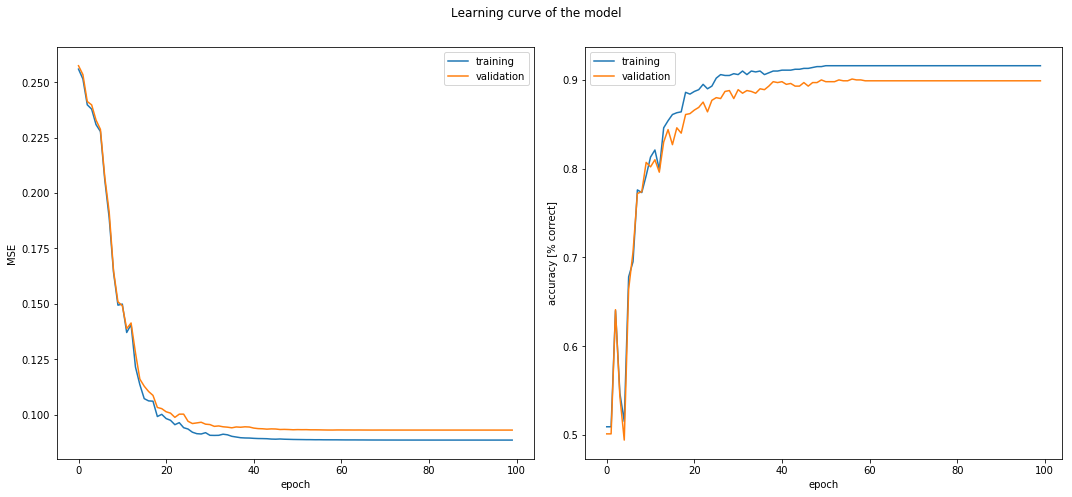

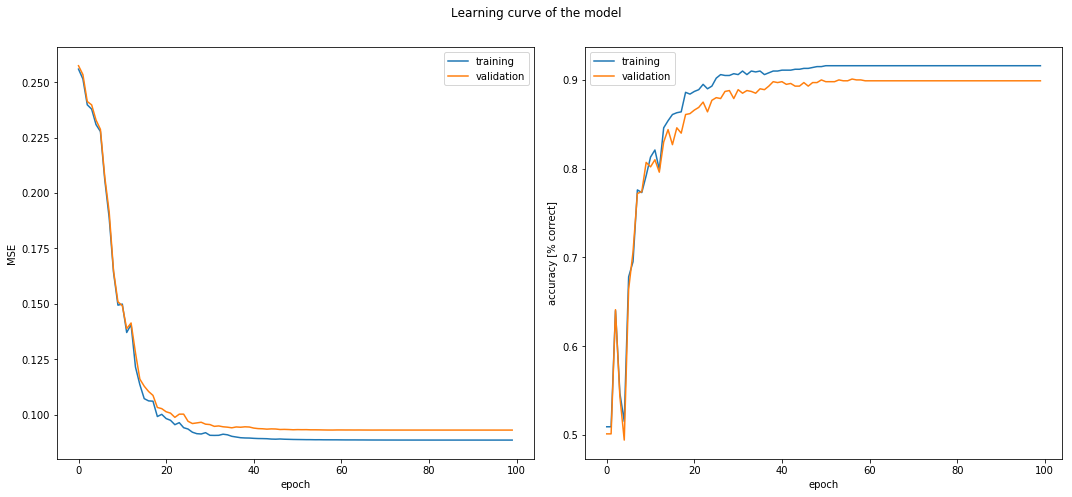

In [17]:
model = build_model()
model.summary()
history = model.fit(x_train, y_train, x_validation, y_validation, epochs=100, step_size=0.01, momentum=None, batch_size=5)
plot_history(history, 'Learning curve of the model')

In [15]:
preds = model.predict(x_validation)

In [16]:
def get_coords(x, indexes):
    xs = []
    ys = []
    for i in indexes:
        xs.append(x[i][0])
        ys.append(x[i][1])
    return xs, ys

In [17]:
x1, y1 = get_coords(x_validation, np.where(preds != y_validation)[0])
x2, y2 = get_coords(x_validation, np.where(preds == y_validation)[0])

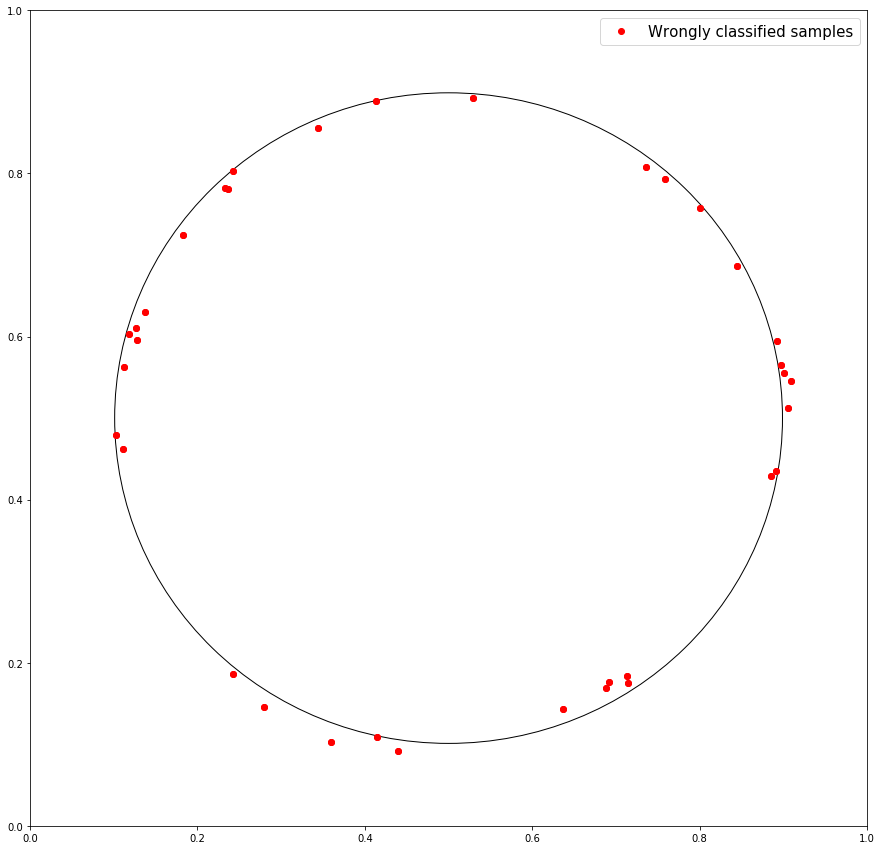

In [18]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.plot(x1, y1, 'ro', color='red', label='Wrongly classified samples')
# plt.plot(x2, y2, 'ro', color='grey', label='Well classified')
ax.add_artist(plt.Circle((0.5, 0.5), 1/math.sqrt(2*math.pi), fill=False, color='black'))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(loc='best', prop={'size': 15})


We see that the classifier makes mistakes on the boundary which is normal.